# Klassifikation Kletterschuhe


## Daten

Eigene Datenerhebung mittels Online-Umfrage: https://forms.gle/PTs57af6sLqk32Wx7

Die Daten wurden getrennt in User-Daten und Schuhe

body_features.csv: Enthält alle Informationen rund um die Person (Geschlecht, Größe, Gewicht, Fußform, Fußmaße, Klettererfahrung)

shoe_survey.csv: Sämtliche von den Personen eingetragene Kletterschuhe (Marke, Modell, Eigenschaften, Bewertungen, etc.)



## Ziel: Schuhmodell vorhersagen

Kann mithilfe der Erfahrungsberichte und Körpereigenschaften der Befragten ein Kletterschuh vorhergesagt werden?

Target Label: shoe_model

# Explorative Analyse

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## body_features

In [40]:
users = pd.read_csv('./data/body_features.csv')

In [41]:
users.head(3)

,userid,gender,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
0,1,Männlich,168,61,29,25.5,10.0,Ägyptischer Fußtyp,Nein,41.5,Vans Authentic,4.0
1,2,Weiblich,168,63,30,24.2,9.8,Römischer Fußtyp,Hallux Valgus,38.5,Adidas cloudfoam,3.0
2,3,Männlich,186,72,36,29.0,10.0,Griechischer Fußtyp,Nein,46.0,Black Diamond Mission LT,30.0


In [42]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   userid             94 non-null     int64  
 1   gender             94 non-null     object 
 2   height             94 non-null     int64  
 3   weight             94 non-null     int64  
 4   age                94 non-null     int64  
 5   foot_len           94 non-null     float64
 6   foot_width         94 non-null     float64
 7   foot_family        94 non-null     object 
 8   foot_deform        94 non-null     object 
 9   street_shoe_size   94 non-null     float64
 10  fav_sneaker_model  81 non-null     object 
 11  exp                94 non-null     float64
dtypes: float64(4), int64(4), object(4)
memory usage: 8.9+ KB


In [43]:
users.columns

Index(['userid', 'gender', 'height', 'weight', 'age', 'foot_len', 'foot_width',
       'foot_family', 'foot_deform', 'street_shoe_size', 'fav_sneaker_model',
       'exp'],
      dtype='object')

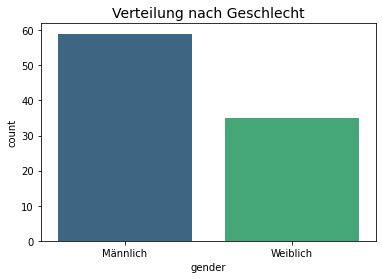

In [44]:
sns.countplot(x='gender', data=users, palette='viridis')
plt.title("Verteilung nach Geschlecht", fontsize=14)
plt.show()

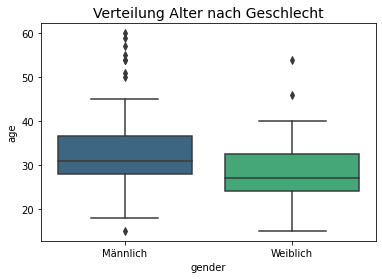

In [45]:
sns.boxplot(x='gender', y='age', data=users, palette='viridis')
plt.title("Verteilung Alter nach Geschlecht", fontsize=14)
plt.show()

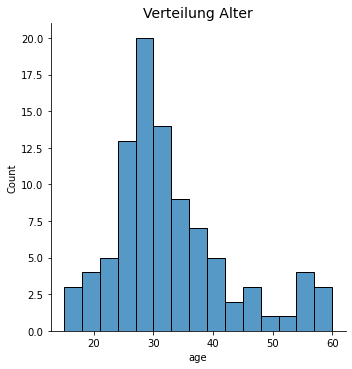

In [89]:
sns.displot(x='age', data=users, bins=15)
plt.title("Verteilung Alter", fontsize=14)
plt.show()

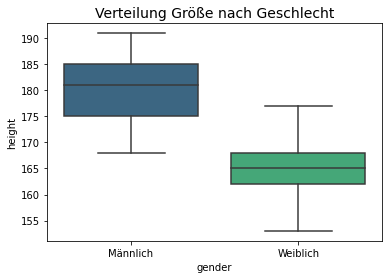

In [46]:
sns.boxplot(x='gender', y='height', data=users, palette='viridis')
plt.title("Verteilung Größe nach Geschlecht", fontsize=14)
plt.show()

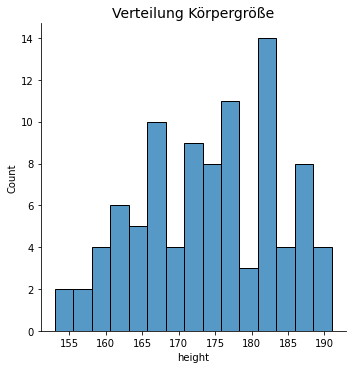

In [87]:
sns.displot(x='height', data=users, bins=15)
plt.title("Verteilung Körpergröße", fontsize=14)
plt.show()

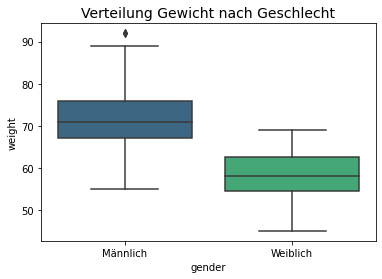

In [47]:
sns.boxplot(x='gender', y='weight', data=users, palette='viridis')
plt.title("Verteilung Gewicht nach Geschlecht", fontsize=14)
plt.show()

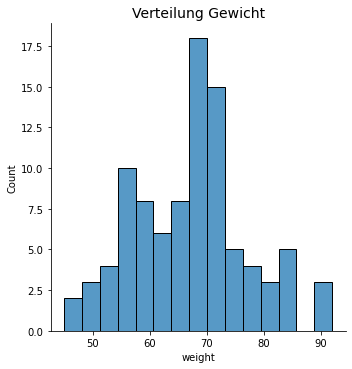

In [90]:
sns.displot(x='weight', data=users, bins=15)
plt.title("Verteilung Gewicht", fontsize=14)
plt.show()

In [48]:
users['foot_family'].value_counts()

Ägyptischer Fußtyp               43
Römischer Fußtyp                 30
Griechischer Fußtyp              20
Mix aus Römisch und Ägyptisch     1
Name: foot_family, dtype: int64

In [49]:
users[users['foot_family'] == 'Mix aus Römisch und Ägyptisch']

,userid,gender,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
13,14,Weiblich,164,58,24,23.0,8.3,Mix aus Römisch und Ägyptisch,Senkfuß,38.0,Nike,3.0


In [50]:
users.at[13,'foot_family'] = 'Ägyptischer Fußtyp'

In [51]:
users['foot_family'].value_counts()

Ägyptischer Fußtyp     44
Römischer Fußtyp       30
Griechischer Fußtyp    20
Name: foot_family, dtype: int64

<AxesSubplot:>

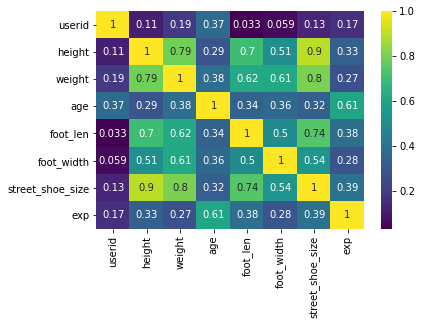

In [99]:
sns.heatmap(users.corr(), cmap='viridis', annot=True)

<AxesSubplot:xlabel='height', ylabel='weight'>

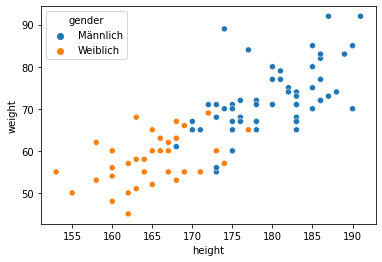

In [92]:
sns.scatterplot(x='height', y='weight', data=users, hue='gender')
plt.title("Zusammenhang Größe und Gewicht nach Geschlecht", fontsize=14)
plt.show()

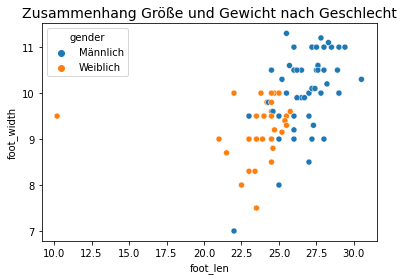

In [96]:
sns.scatterplot(x='foot_len', y='foot_width', data=users, hue='gender')
plt.title("Zusammenhang Größe und Gewicht nach Geschlecht", fontsize=14)
plt.show()

## shoe_features

In [100]:
shoes = pd.read_csv('./data/shoe_survey.csv')

In [101]:
shoes.head(3)

,userid,timestamp,shoe_brand,shoe_model,Modell nicht in der Liste?,climb_shoe_size,shoe_age,favourite,shoe_vorspann,shoe_downturn,shoe_asymetry,shoe_closing_type,climb_style,terrain,rate_fit,rate_comfort,rate_stiffness,use_freq,climb_grade,overall_rating
0,1,24.02.2021 22:27:44,La Sportiva,La Sportiva - SKWAMA,NaN,39.0,2.0,Ja,Ja,Ja,Nein,Klett,"Sportklettern, Bouldern",Beides,5.0,4.0,4.0,4.0,Fortgeschritten (UIAA 7 - 9),5.0
1,2,25.02.2021 08:26:50,La Sportiva,La Sportiva - SOLUTION COMP WOMAN,NaN,37.5,0.7,Ja,Ja,Ja,Ja,Klett,Bouldern,Halle,4.0,4.0,3.0,3.0,Fortgeschritten (UIAA 7 - 9),4.0
2,3,25.02.2021 10:28:25,La Sportiva,La Sportiva - SKWAMA,NaN,42.5,1.0,Ja,Ja,Ja,Ja,Klett,"Sportklettern, Bouldern",Beides,5.0,4.0,5.0,5.0,Fortgeschritten (UIAA 7 - 9),5.0


In [102]:
shoes.drop('timestamp', axis=1, inplace=True)

<AxesSubplot:>

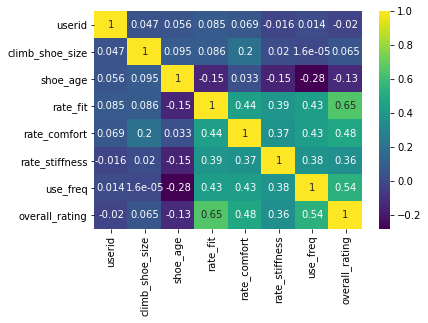

In [103]:
sns.heatmap(shoes.corr(), cmap='viridis', annot=True)

In [107]:
shoes['shoe_model'].value_counts().sort_values(ascending=False).head(10)

Sonstige                        15
La Sportiva - SKWAMA            11
Scarpa - VAPOR V                 8
Ocun - OZONE QC                  7
La Sportiva - OTAKI              5
Five Ten - HIANGLE               5
Scarpa - DRAGO                   5
Red Chili - SPIRIT VCR           5
La Sportiva - SOLUTION WOMAN     4
Scarpa - INSTINCT VS             4
Name: shoe_model, dtype: int64

In [108]:
shoes['shoe_model'].value_counts().sort_values(ascending=False).head(10)

Sonstige                        15
La Sportiva - SKWAMA            11
Scarpa - VAPOR V                 8
Ocun - OZONE QC                  7
La Sportiva - OTAKI              5
Five Ten - HIANGLE               5
Scarpa - DRAGO                   5
Red Chili - SPIRIT VCR           5
La Sportiva - SOLUTION WOMAN     4
Scarpa - INSTINCT VS             4
Name: shoe_model, dtype: int64

<AxesSubplot:xlabel='shoe_brand', ylabel='count'>

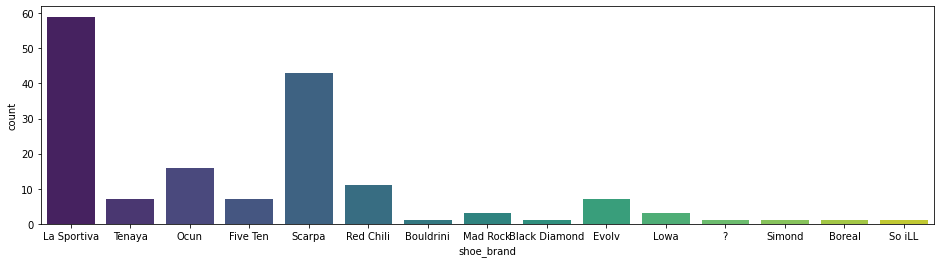

In [112]:
plt.figure(figsize=(16,4))
sns.countplot(x='shoe_brand', data=shoes, palette='viridis')

<AxesSubplot:xlabel='shoe_closing_type', ylabel='count'>

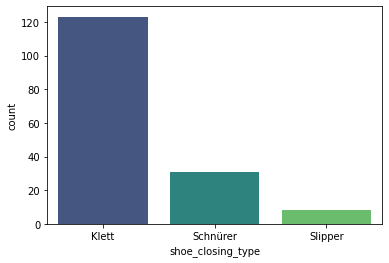

In [114]:
sns.countplot(x='shoe_closing_type', data=shoes, palette='viridis')

In [116]:
shoes['climb_grade'].unique()

array(['Fortgeschritten (UIAA 7 - 9)', 'Anfänger (UIAA < 7)',
       'Profi (UIAA > 9)', nan], dtype=object)

<AxesSubplot:xlabel='climb_grade', ylabel='count'>

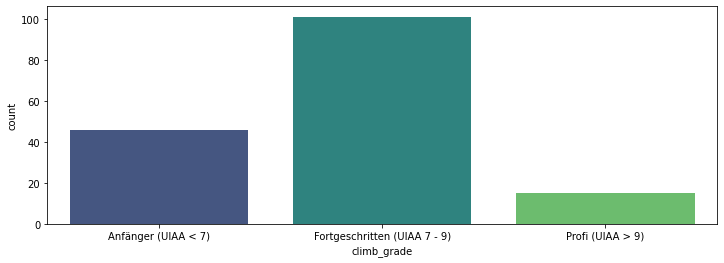

In [119]:
order = ['Anfänger (UIAA < 7)','Fortgeschritten (UIAA 7 - 9)',
       'Profi (UIAA > 9)']
plt.figure(figsize=(12,4))
sns.countplot(x='climb_grade', data=shoes, palette='viridis', order=order)

## Zusammenhänge Körper- & Schuheigenschaften

In [120]:
df = pd.concat([users,shoes],axis=1)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   userid                      94 non-null     float64
 1   gender                      94 non-null     object 
 2   height                      94 non-null     float64
 3   weight                      94 non-null     float64
 4   age                         94 non-null     float64
 5   foot_len                    94 non-null     float64
 6   foot_width                  94 non-null     float64
 7   foot_family                 94 non-null     object 
 8   foot_deform                 94 non-null     object 
 9   street_shoe_size            94 non-null     float64
 10  fav_sneaker_model           81 non-null     object 
 11  exp                         94 non-null     float64
 12  userid                      564 non-null    int64  
 13  shoe_brand                  162 non

In [134]:
df.isnull().sum()

userid                        470
gender                        470
height                        470
weight                        470
age                           470
foot_len                      470
foot_width                    470
foot_family                   470
foot_deform                   470
street_shoe_size              470
fav_sneaker_model             483
exp                           470
userid                          0
shoe_brand                    402
shoe_model                    402
Modell nicht in der Liste?    557
climb_shoe_size               402
shoe_age                      402
favourite                     405
shoe_vorspann                 402
shoe_downturn                 402
shoe_asymetry                 402
shoe_closing_type             402
climb_style                   402
terrain                       402
rate_fit                      402
rate_comfort                  402
rate_stiffness                402
use_freq                      402
climb_grade   

In [136]:
df.dropna(subset=['shoe_brand'])

,userid,gender,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,...,shoe_asymetry,shoe_closing_type,climb_style,terrain,rate_fit,rate_comfort,rate_stiffness,use_freq,climb_grade,overall_rating
0,1.0,Männlich,168.0,61.0,29.0,25.5,10.0,Ägyptischer Fußtyp,Nein,41.5,...,Nein,Klett,"Sportklettern, Bouldern",Beides,5.0,4.0,4.0,4.0,Fortgeschritten (UIAA 7 - 9),5.0
1,2.0,Weiblich,168.0,63.0,30.0,24.2,9.8,Römischer Fußtyp,Hallux Valgus,38.5,...,Ja,Klett,Bouldern,Halle,4.0,4.0,3.0,3.0,Fortgeschritten (UIAA 7 - 9),4.0
2,3.0,Männlich,186.0,72.0,36.0,29.0,10.0,Griechischer Fußtyp,Nein,46.0,...,Ja,Klett,"Sportklettern, Bouldern",Beides,5.0,4.0,5.0,5.0,Fortgeschritten (UIAA 7 - 9),5.0
3,4.0,Männlich,186.0,72.0,36.0,29.0,10.0,Griechischer Fußtyp,Nein,46.0,...,Ja,Klett,"Sportklettern, Bouldern",Beides,5.0,4.0,5.0,5.0,Fortgeschritten (UIAA 7 - 9),5.0
4,5.0,Männlich,178.0,67.0,33.0,27.0,10.0,Römischer Fußtyp,Hallux Valgus,42.0,...,Ja,Klett,"Sportklettern, Bouldern",Halle,4.0,4.0,5.0,3.0,Anfänger (UIAA < 7),4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Nein,Schnürer,"Sportklettern, Mehrseillängen",Outdoor,5.0,5.0,4.0,4.0,Fortgeschritten (UIAA 7 - 9),5.0
288,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ja,Klett,"Sportklettern, Bouldern",Beides,3.0,1.0,1.0,2.0,Anfänger (UIAA < 7),4.0
324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Nein,Schnürer,Sportklettern,Outdoor,4.0,3.0,3.0,3.0,Fortgeschritten (UIAA 7 - 9),4.0
340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ja,Klett,"Sportklettern, Bouldern, Mehrseillängen",Beides,3.0,3.0,2.0,2.0,Anfänger (UIAA < 7),3.0


In [127]:
df.head(3)

,userid,gender,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,...,shoe_asymetry,shoe_closing_type,climb_style,terrain,rate_fit,rate_comfort,rate_stiffness,use_freq,climb_grade,overall_rating
0,1.0,Männlich,168.0,61.0,29.0,25.5,10.0,Ägyptischer Fußtyp,Nein,41.5,...,Nein,Klett,"Sportklettern, Bouldern",Beides,5.0,4.0,4.0,4.0,Fortgeschritten (UIAA 7 - 9),5.0
1,2.0,Weiblich,168.0,63.0,30.0,24.2,9.8,Römischer Fußtyp,Hallux Valgus,38.5,...,Ja,Klett,Bouldern,Halle,4.0,4.0,3.0,3.0,Fortgeschritten (UIAA 7 - 9),4.0
2,3.0,Männlich,186.0,72.0,36.0,29.0,10.0,Griechischer Fußtyp,Nein,46.0,...,Ja,Klett,"Sportklettern, Bouldern",Beides,5.0,4.0,5.0,5.0,Fortgeschritten (UIAA 7 - 9),5.0


<AxesSubplot:>

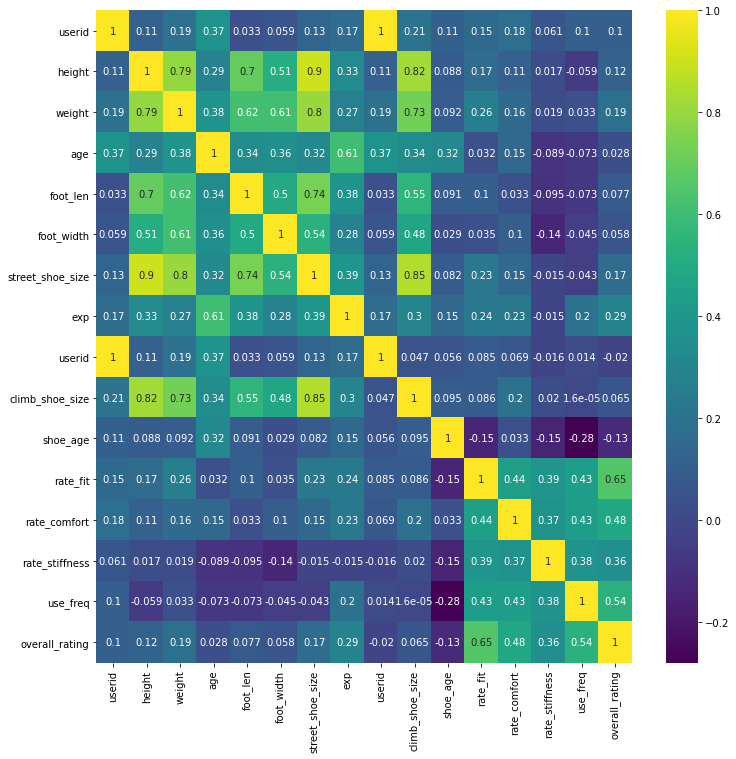

In [130]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), cmap='viridis', annot=True)

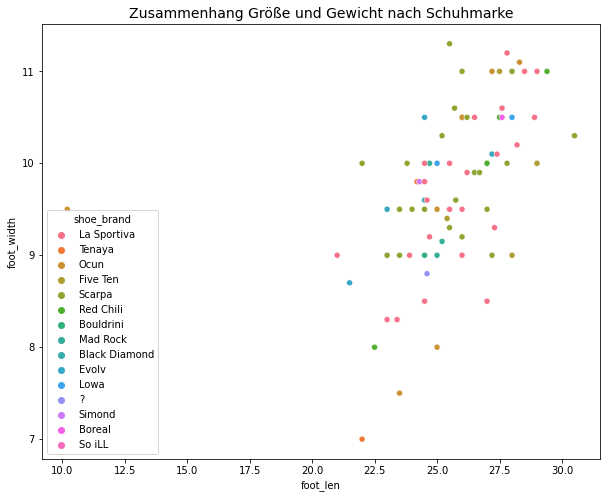

In [125]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='foot_len', y='foot_width', data=df, hue='shoe_brand')

plt.title("Zusammenhang Größe und Gewicht nach Schuhmarke", fontsize=14)
plt.show()

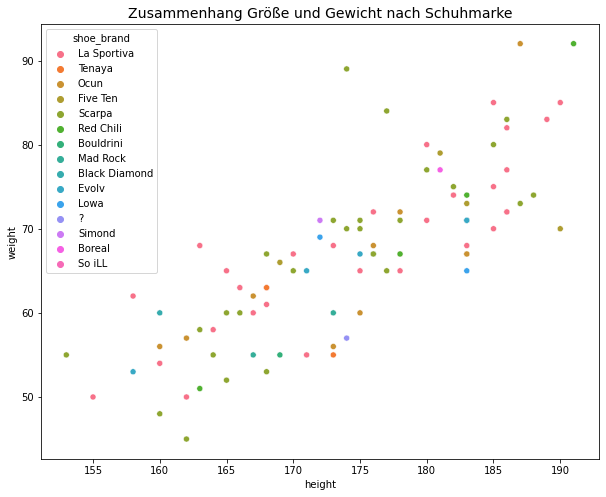

In [126]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='height', y='weight', data=df, hue='shoe_brand')
plt.title("Zusammenhang Größe und Gewicht nach Schuhmarke", fontsize=14)
plt.show()

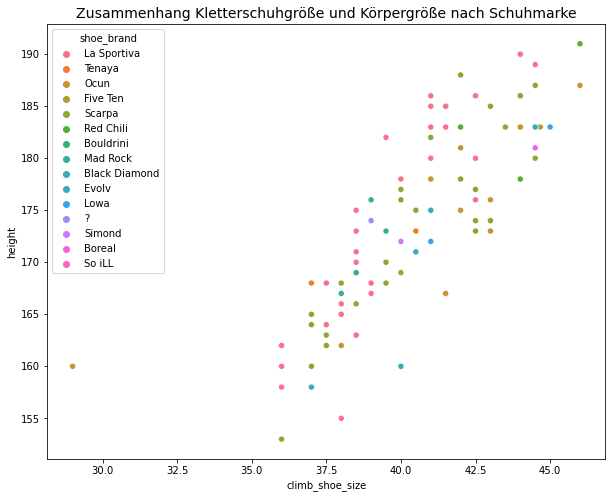

In [131]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='climb_shoe_size', y='height', data=df, hue='shoe_brand')
plt.title("Zusammenhang Kletterschuhgröße und Körpergröße nach Schuhmarke", fontsize=14)
plt.show()

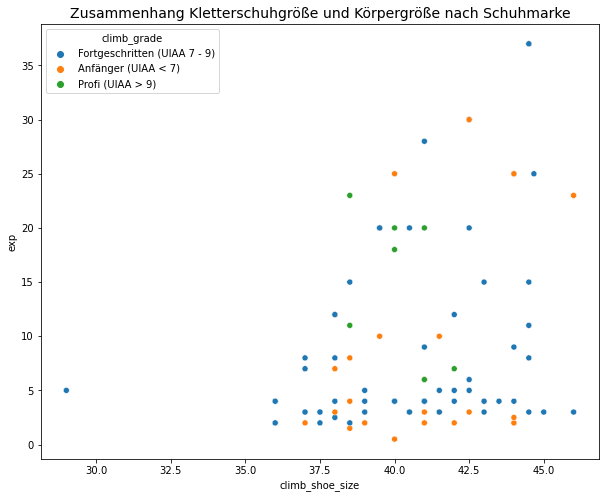

In [132]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='climb_shoe_size', y='exp', data=df, hue='climb_grade')
plt.title("Zusammenhang Kletterschuhgröße und Körpergröße nach Schuhmarke", fontsize=14)
plt.show()

# Feature Engineering

In [137]:
shoes = pd.read_csv('./data/shoe_survey.csv', usecols=['userid', 'shoe_model'])

In [138]:
shoes.isnull().sum()

userid          0
shoe_model    402
dtype: int64

In [139]:
shoes = shoes.dropna(subset=['shoe_model'])
shoes.reset_index(drop=True, inplace=True)
shoes.isnull().sum()

userid        0
shoe_model    0
dtype: int64

In [140]:
shoes.tail(3)

,userid,shoe_model
159,43,La Sportiva - TC PRO
160,59,Ocun - OZONE QC
161,4,La Sportiva - SOLUTION COMP


In [56]:
users.shape

(94, 12)

In [57]:
users.head()

,userid,gender,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
0,1,Männlich,168,61,29,25.5,10.0,Ägyptischer Fußtyp,Nein,41.5,Vans Authentic,4.0
1,2,Weiblich,168,63,30,24.2,9.8,Römischer Fußtyp,Hallux Valgus,38.5,Adidas cloudfoam,3.0
2,3,Männlich,186,72,36,29.0,10.0,Griechischer Fußtyp,Nein,46.0,Black Diamond Mission LT,30.0
3,4,Männlich,186,72,36,29.0,10.0,Griechischer Fußtyp,Nein,46.0,Black Diamond Mission LT,30.0
4,5,Männlich,178,67,33,27.0,10.0,Römischer Fußtyp,Hallux Valgus,42.0,Adidas Stan Smith,3.0


In [58]:
dummies = pd.get_dummies(shoes['shoe_model'],drop_first=True)
df_conc = pd.concat([shoes['userid'],dummies],axis=1)
df_y = df_conc.groupby('userid').sum()
df_y.reset_index(drop=True, inplace=True)
#users= pd.concat([users,df],axis=1)
#df_con.head(10)

df_y.shape

(94, 66)

In [59]:
users['gender'].value_counts()

Männlich    59
Weiblich    35
Name: gender, dtype: int64

In [60]:
dummies = pd.get_dummies(users['gender'],drop_first=True)
df = pd.concat([users.drop('gender',axis=1),dummies],axis=1)

In [61]:
df.head(3)

,userid,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp,Weiblich
0,1,168,61,29,25.5,10.0,Ägyptischer Fußtyp,Nein,41.5,Vans Authentic,4.0,0
1,2,168,63,30,24.2,9.8,Römischer Fußtyp,Hallux Valgus,38.5,Adidas cloudfoam,3.0,1
2,3,186,72,36,29.0,10.0,Griechischer Fußtyp,Nein,46.0,Black Diamond Mission LT,30.0,0


In [62]:
df.select_dtypes(['object']).columns

Index(['foot_family', 'foot_deform', 'fav_sneaker_model'], dtype='object')

In [63]:
users['foot_family'].value_counts()

Ägyptischer Fußtyp     44
Römischer Fußtyp       30
Griechischer Fußtyp    20
Name: foot_family, dtype: int64

In [64]:
dummies = pd.get_dummies(df['foot_family'],drop_first=True)
df = pd.concat([df.drop('foot_family',axis=1),dummies],axis=1)
df.head(3)

,userid,height,weight,age,foot_len,foot_width,foot_deform,street_shoe_size,fav_sneaker_model,exp,Weiblich,Römischer Fußtyp,Ägyptischer Fußtyp
0,1,168,61,29,25.5,10.0,Nein,41.5,Vans Authentic,4.0,0,0,1
1,2,168,63,30,24.2,9.8,Hallux Valgus,38.5,Adidas cloudfoam,3.0,1,1,0
2,3,186,72,36,29.0,10.0,Nein,46.0,Black Diamond Mission LT,30.0,0,0,0


In [65]:
users['foot_deform'].value_counts()

Nein                                                        44
Spreizfuß                                                    9
Hallux Valgus                                                8
Senkfuß                                                      5
Plattfuß                                                     5
Knickfuß                                                     3
Nein, Spreizfuß                                              3
Nein, Knickfuß                                               2
Hallux Valgus, Senkfuß                                       2
Plattfuß, Spreizfuß                                          1
Hallux Valgus, Plattfuß, Senkfuß, Spreizfuß                  1
Hohlfuß                                                      1
Nein, Senkfuß, Spreizfuß                                     1
Nein, Hallux Valgus                                          1
Senkfuß, Spreizfuß                                           1
Hallux Valgus, Plattfuß                                

In [66]:
users[users['foot_deform'] == 'Nein, abgeflachtes Quergewölbe, aber noch kein Spreizfuß']

,userid,gender,height,weight,age,foot_len,foot_width,foot_family,foot_deform,street_shoe_size,fav_sneaker_model,exp
61,62,Weiblich,169,66,54,25.4,9.4,Römischer Fußtyp,"Nein, abgeflachtes Quergewölbe, aber noch kein...",40.0,"Laufschuhe von Joe Nimble, based on Bär",25.0


In [67]:
users.at[61,'foot_deform'] = 'Nein'
df.at[61,'foot_deform'] = 'Nein'

In [68]:
users['foot_deform'].value_counts()

Nein                                           45
Spreizfuß                                       9
Hallux Valgus                                   8
Plattfuß                                        5
Senkfuß                                         5
Knickfuß                                        3
Nein, Spreizfuß                                 3
Nein, Knickfuß                                  2
Hallux Valgus, Senkfuß                          2
Hallux Valgus, Plattfuß, Senkfuß, Spreizfuß     1
Hohlfuß                                         1
Nein, Senkfuß, Spreizfuß                        1
Nein, Hallux Valgus                             1
Plattfuß, Spreizfuß                             1
Hallux Valgus, Hohlfuß                          1
Hallux Valgus, Plattfuß                         1
Senkfuß, Spreizfuß                              1
Nein, Hallux Valgus, Senkfuß                    1
Nein, Senkfuß                                   1
Plattfuß, Senkfuß                               1


In [69]:
df[df['foot_deform'] == 'Hallux Valgus, Senkfuß']

,userid,height,weight,age,foot_len,foot_width,foot_deform,street_shoe_size,fav_sneaker_model,exp,Weiblich,Römischer Fußtyp,Ägyptischer Fußtyp
11,12,177,65,25,27.0,10.0,"Hallux Valgus, Senkfuß",40.5,Adidas / Nikes,18.0,1,0,0
93,94,191,92,60,29.4,11.0,"Hallux Valgus, Senkfuß",46.5,NaN,23.0,0,0,0


In [70]:
def strip_list(liste):
    stripped = []
    
    for n in liste:
        stripped.append(n.strip())
    
    return stripped

deformations = ['Hallux Valgus', 'Senkfuß','Spreizfuß','Plattfuß', 'Hohlfuß','Knickfuß', 'Fersenbein']

for deform in deformations:
    df[deform.lower().split()[0]] = df.apply(lambda row: 1 if deform in strip_list(row.foot_deform.split(',')) else 0, axis=1)

df.head(12)

,userid,height,weight,age,foot_len,foot_width,foot_deform,street_shoe_size,fav_sneaker_model,exp,Weiblich,Römischer Fußtyp,Ägyptischer Fußtyp,hallux,senkfuß,spreizfuß,plattfuß,hohlfuß,knickfuß,fersenbein
0,1,168,61,29,25.5,10.0,Nein,41.5,Vans Authentic,4.0,0,0,1,0,0,0,0,0,0,0
1,2,168,63,30,24.2,9.8,Hallux Valgus,38.5,Adidas cloudfoam,3.0,1,1,0,1,0,0,0,0,0,0
2,3,186,72,36,29.0,10.0,Nein,46.0,Black Diamond Mission LT,30.0,0,0,0,0,0,0,0,0,0,0
3,4,186,72,36,29.0,10.0,Nein,46.0,Black Diamond Mission LT,30.0,0,0,0,0,0,0,0,0,0,0
4,5,178,67,33,27.0,10.0,Hallux Valgus,42.0,Adidas Stan Smith,3.0,0,1,0,1,0,0,0,0,0,0
5,6,183,67,29,27.2,11.0,Spreizfuß,44.0,Adidas Stan Smith,2.0,0,0,1,0,0,1,0,0,0,0
6,7,183,68,26,26.5,10.5,Hallux Valgus,43.0,kangaroos,10.0,0,0,0,1,0,0,0,0,0,0
7,8,175,60,28,25.0,9.5,Nein,42.0,NaN,12.0,0,0,1,0,0,0,0,0,0,0
8,9,175,65,31,26.0,10.5,Nein,41.0,Halbschuhe von Hilfiger oder BoxFresh,11.0,0,0,1,0,0,0,0,0,0,0
9,10,181,79,29,29.0,10.0,"Nein, Spreizfuß",43.5,Vans,7.0,0,0,1,0,0,1,0,0,0,0


In [71]:
df = df.drop(['userid', 'fav_sneaker_model','foot_deform'] , axis=1)

In [72]:
df.select_dtypes(['object']).columns

Index([], dtype='object')

In [74]:
df.shape

(94, 18)

In [75]:
df_y.shape

(94, 66)

# Klassifizierung

## K-Nearest Neighbor

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

## Logistische Regression

# Multiklassen Klassifizierung

### Ziel: Mehrere Outputs vorhersagen

### Grundprinzipien:
One vs. All -> Wenn eine Klasse 1 ist, sind alle anderen 0<br>
One vs. One -> Pärchenweiser Vergleich aller Outputklassen 



## Logistische Regression

## Neuronales Netz 

Output Aktivirungsfunktion: Sigmoid

In [82]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [149]:
X = df.drop('userid',axis=1).values
y = df_y.values

print(len(y))

94


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [151]:
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [152]:
X_train.shape

(65, 17)

In [153]:
X_test.shape

(29, 17)

In [154]:
y_train.shape

(65, 66)

In [155]:
y_test.shape

(29, 66)

In [169]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [177]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(units=17, activation='relu'))
    model.add(Dense(units=8, activation='relu'))
    model.add(Dense(units=66, activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [178]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [180]:
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Baseline: 0.00% (0.00%)


In [167]:
#model.fit(x=X_train, 
#          y=y_train, 
#          epochs=100,
#          batch_size=10,
#          validation_data=(X_test, y_test), verbose=1
#          )

In [171]:
#model_loss = pd.DataFrame(model.history.history)

In [172]:
#model_loss.plot()